In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import fowlkes_mallows_score, adjusted_mutual_info_score, adjusted_rand_score
from scipy.stats import wishart

from spectral import spectral_clustering

np.random.seed(42)

In [119]:
def get_random_clustering(n, n_clusters):
    X = []
    Y = []
    for i in range(n_clusters):
        mean = (i, i)
        #cov =  wishart.rvs(10, [[0.5, 0], [0, 0.5]])
        cov = [[0.2, 0], [0, 0.2]]
        X.append(np.random.multivariate_normal(mean, cov, n))
        Y.append(np.full(n, i))
    return np.concatenate(X), np.concatenate(Y)

In [84]:
n = 20
k = 2
X, Y = get_random_clustering(n, k)

In [90]:
def plot_2d_vectors(X, Y, title=None):
    """Plots 2D vectors represented as a matrix of 2d vectors with different colors for different classes"""
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    if title:
        plt.title(title)
    plt.show()

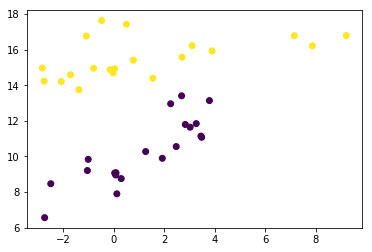

In [93]:
plot_2d_vectors(X, Y)

In [88]:
Y_pred = spectral_clustering(X, 2, 2)

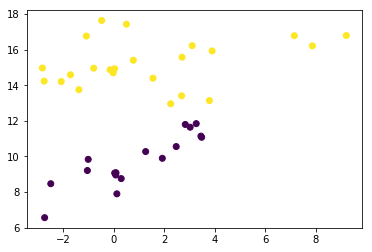

In [89]:
plot_2d_vectors(X, Y_pred)

Widzimy, że algorytm działa całkiem nieźle. Dobrze odróżnia skupienia, a niezgodność w klasyfikacji niektórych punktów wynika po prostu z faktu, że część punktów jest outlierami. Rysunek skupień po wykonaniu algorytmu jest na oko nawet czasami lepszy niż patrzenie na to z jakiego rozkładu te punkty pochodzą.

Number of clusters: 1


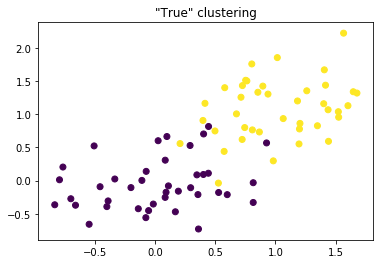

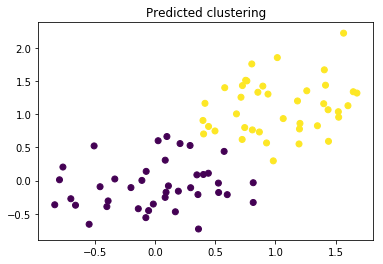

Number of clusters: 2


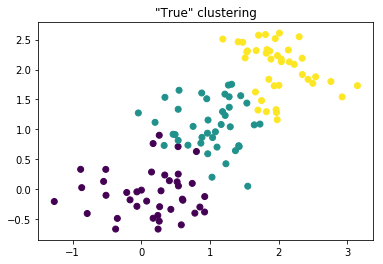

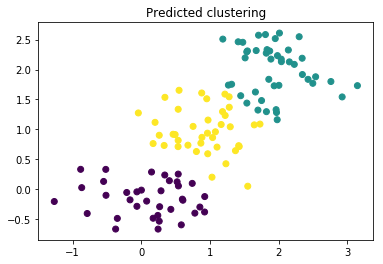

Number of clusters: 3


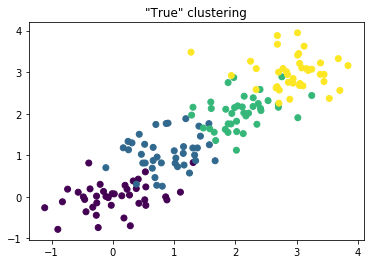

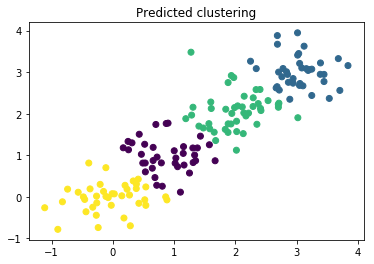

Number of clusters: 4


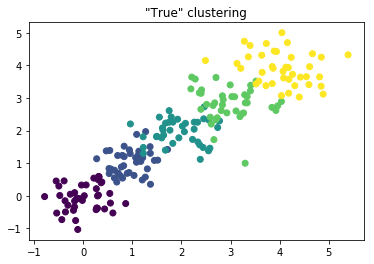

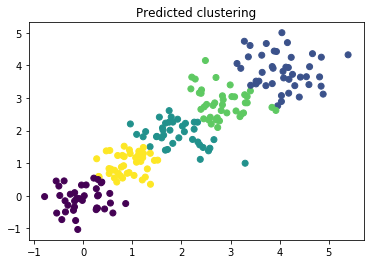

In [120]:
def generate_predict():
    for k in range(2, 6):
        print("Number of clusters: {}".format(k - 1))
        X, Y = get_random_clustering(40, k)
        plot_2d_vectors(X, Y, title="\"True\" clustering")
        Y_pred = spectral_clustering(X, k, 2)
        plot_2d_vectors(X, Y_pred, title="Predicted clustering")

generate_predict()

Czasami generowanie z losowych rozkładów sprawia, że podział jest mało wyraźny 